# Shortest path over a surface

Nicolas Guarin-Zapata

This is a notebook where I play a little with optimization of distance of paths over surfaces.

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

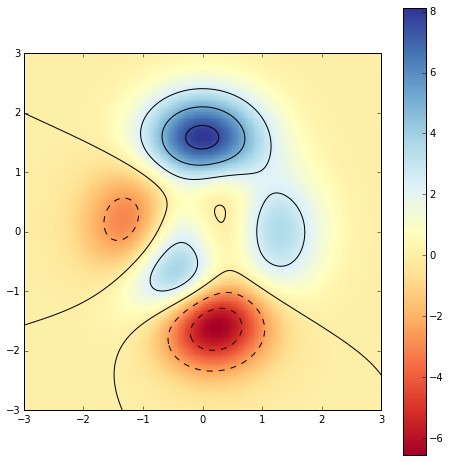

In [2]:
%matplotlib inline
def peaks(x,y):
    return 3*(1-x)**2*np.exp(-x**2 - (y+1)**2) \
            - 10*(x/5 - x**3 - y**5)*np.exp(-x**2-y**2) \
            - 1/3*np.exp(-(x+1)**2 - y**2)
       
def peaks_diff(x,y):
    gx = -6*x*(-x + 1)**2*np.exp(-x**2 - (y + 1)**2) \
        +  2*x*(-10*x**3 + 2*x - 10*y**5)*np.exp(-x**2 - y**2) \
        - (-2*x - 2)*np.exp(-y**2 - (x + 1)**2)/3 \
        + 3*(2*x - 2)*np.exp(-x**2 - (y + 1)**2) \
        - (-30*x**2 + 2)*np.exp(-x**2 - y**2) 
    gy = 50*y**4*np.exp(-x**2 - y**2) + 2*y*(-10*x**3 \
        + 2*x - 10*y**5)*np.exp(-x**2 - y**2)\
        + 2*y*np.exp(-y**2 \
        - (x + 1)**2)/3 + 3*(-x + 1)**2*(-2*y - 2)*np.exp(-x**2 - (y + 1)**2)
    return gx, gy
        
xt,yt = np.mgrid[-3:3:200j, -3:3:200j]
zt = peaks(xt,yt)
plt.figure(figsize=(8,8))
plt.pcolor(xt, yt, zt, cmap='RdYlBu'); plt.colorbar();
plt.axis('image');
plt.contour(xt, yt, zt, colors='k');


In [3]:
import scipy.optimize as opt
from scipy.integrate import simps

In [4]:
def len_fun(x0, x1, f, a, b):
    y = f(x0, x1)
    fa = f(a[0], a[1])
    fb = f(b[0], b[1])
    n = len(y)
    Dx2 = (x0[0] - a[0])**2 + (x1[0] - a[1])**2
    S = np.sqrt(Dx2 + (y[0] - fa)**2)
    Dx2 = (x0[n-1] - b[0])**2 + (x1[n-1] - b[1])**2
    S = S + np.sqrt(Dx2 + (y[n-1] - fb)**2)
    for k in xrange(1,n):
        Dx2 = (x0[k] - x0[k-1])**2 + (x1[k] - x1[k-1])**2
        S = S + np.sqrt(Dx2 + (y[k] - y[k-1])**2)
        
    return S
    

## Plane

In [5]:
n = 50
a = np.array([-1,-1])
b = np.array([1, 1])
x = np.linspace(a[0],b[0], n)
y = np.linspace(a[1],b[1], n)
xn = x[1:-1]
yn = y[1:-1]

def plane(x,y): return x + y

In [6]:
x0 = xn
y0 = np.sign(yn)*yn**2
res = opt.minimize(len_fun, np.hstack([x0]), args=(y0,plane, a,b))
print res.message

Optimization terminated successfully.


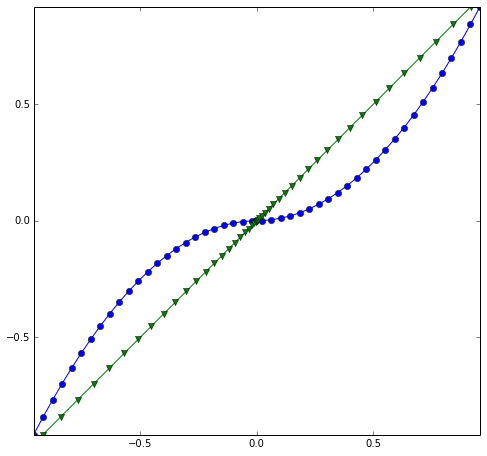

In [7]:
plt.figure(figsize=(8,8))
plt.plot(x0,y0,'-o');
plt.plot(res.x, y0, '-v');
plt.axis('image');

## Hemisphere

In [8]:
n = 50
a = np.array([-1,-1])
b = np.array([1, 1])
x = np.linspace(a[0],b[0], n)
y = np.linspace(a[1],b[1], n)
xn = x[1:-1]
yn = y[1:-1]

def hemi(x,y): return np.sqrt(2 - x**2 - y**2)

In [9]:
x0 = xn
y0 = np.sign(yn)*yn**2
res = opt.minimize(len_fun, np.hstack([x0]), args=(y0,hemi, a,b))
print res.message

Optimization terminated successfully.


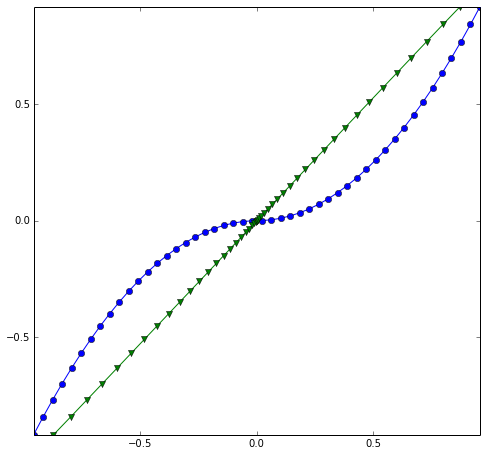

In [10]:
plt.figure(figsize=(8,8))
plt.plot(x0,y0,'-o');
plt.plot(res.x, y0, '-v');
plt.axis('image');

## Peaks

In [11]:
n = 200
a = np.array([0.5,-3])
b = np.array([-0.5, 3])
x = np.linspace(a[0],b[0], n)
y = np.linspace(a[1],b[1], n)
xn = x[1:-1]
yn = y[1:-1]

In [12]:
x0 = xn
y0 = yn
print "Original length", len_fun(x0,y0,peaks,a,b)
res = opt.minimize(len_fun, np.hstack([x0]), args=(y0,peaks, a,b))
print res.message
print "Final length", len_fun(res.x,y0,peaks,a,b)

Original length 30.8846560479
Desired error not necessarily achieved due to precision loss.
Final length 8.45388286012


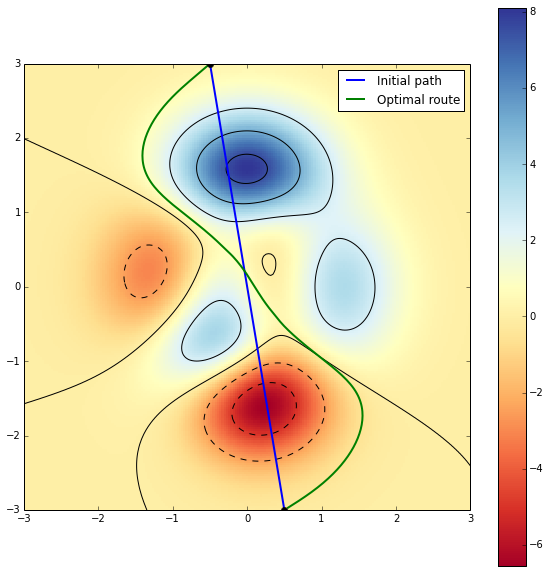

In [13]:
plt.figure(figsize=(10,10))
plt.pcolor(xt, yt, zt, cmap='RdYlBu'); plt.colorbar();
plt.contour(xt, yt, zt, colors='k');
plt.plot(x0, y0, lw=2);
plt.plot(res.x, y0, lw=2);
plt.plot([a[0], b[0]], [a[1], b[1]], 'ok')
plt.axis('image');
plt.legend(['Initial path', "Optimal route"]);

In [14]:
x0 = xn - np.sin(np.pi*yn/3)
y0 = yn
print "Original length", len_fun(x0,y0,peaks,a,b)
res = opt.minimize(len_fun, np.hstack([x0]), args=(y0,peaks, a,b))
print res.message
print "Final length", len_fun(res.x,y0,peaks,a,b)

Original length 12.1609182697
Desired error not necessarily achieved due to precision loss.
Final length 8.45388285986


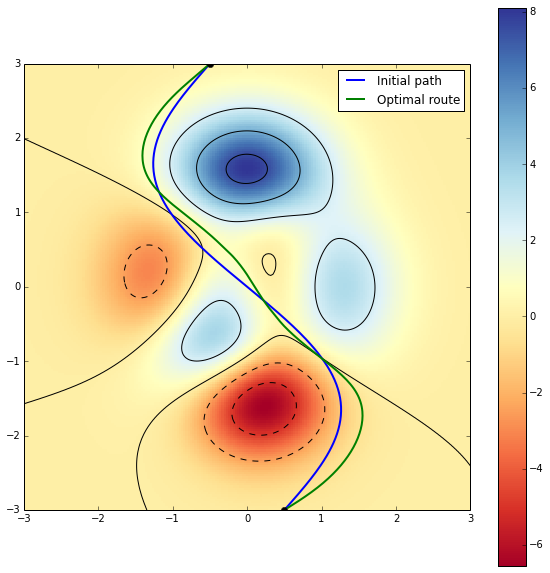

In [15]:
plt.figure(figsize=(10,10))
plt.pcolor(xt, yt, zt, cmap='RdYlBu'); plt.colorbar();
plt.contour(xt, yt, zt, colors='k');
plt.plot(x0, y0, lw=2);
plt.plot(res.x, y0, lw=2);
plt.plot([a[0], b[0]], [a[1], b[1]], 'ok')
plt.axis('image');
plt.legend(['Initial path', "Optimal route"]);

In [16]:
x0 = xn - 0.2*np.sin(5*np.pi*yn/3)
y0 = yn
print "Original length", len_fun(x0,y0,peaks,a,b)
res = opt.minimize(len_fun, np.hstack([x0]), args=(y0,peaks, a,b))
print res.message
print "Final length", len_fun(res.x,y0,peaks,a,b)

Original length 30.2191258341
Desired error not necessarily achieved due to precision loss.
Final length 8.45388286013


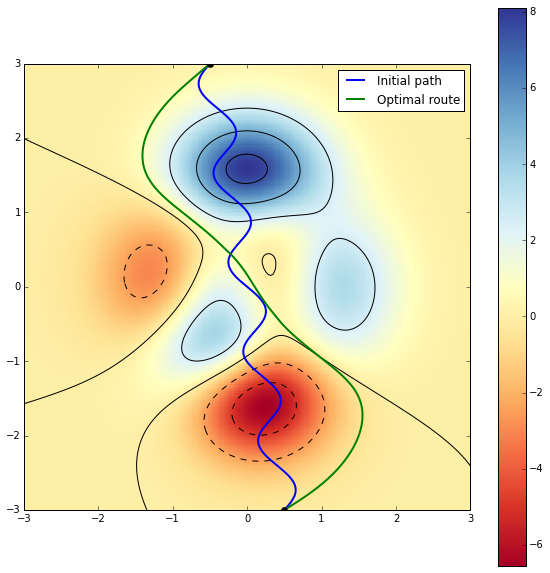

In [17]:
plt.figure(figsize=(10,10))
plt.pcolor(xt, yt, zt, cmap='RdYlBu'); plt.colorbar();
plt.contour(xt, yt, zt, colors='k');
plt.plot(x0, y0, lw=2);
plt.plot(res.x, y0, lw=2);
plt.plot([a[0], b[0]], [a[1], b[1]], 'ok')
plt.axis('image');
plt.legend(['Initial path', "Optimal route"]);

In [18]:
x0 = -0.5 + 1/3*yn
x0[len(x0)/2+1:-1] = -0.5
y0 = yn
print "Original length", len_fun(x0,y0,peaks,a,b)
res = opt.minimize(len_fun, np.hstack([x0]), args=(y0,peaks, a,b))
print res.message
print "Final length", len_fun(res.x,y0,peaks,a,b)

Original length 24.2998471457
Desired error not necessarily achieved due to precision loss.
Final length 8.61668270855


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


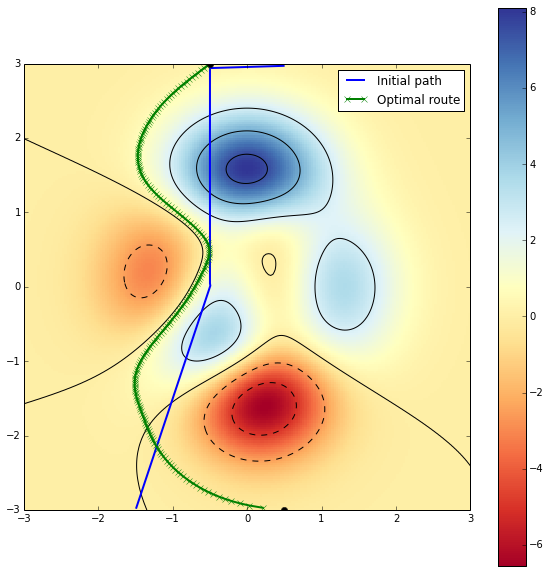

In [19]:
plt.figure(figsize=(10,10))
plt.pcolor(xt, yt, zt, cmap='RdYlBu'); plt.colorbar();
plt.contour(xt, yt, zt, colors='k');
plt.plot(x0, y0, lw=2);
plt.plot(res.x, y0, 'x-', lw=2);
plt.plot([a[0], b[0]], [a[1], b[1]], 'ok')
plt.axis('image');
plt.legend(['Initial path', "Optimal route"]);

## Computing the slopes

In [20]:
def tangents(x0, x1, a, b):
    tx = np.zeros_like(x0)
    ty = np.zeros_like(x0)
    n = len(x0)
    for k in xrange(0,n):
        if k==0:
            t1 = np.array([x0[k] - a[0], x1[k] - a[1]])
            t2 = np.array([x0[k+1] - x0[k], x1[k+1] - x1[k]])
        elif k==n-1:
            t1 = np.array([x0[k] - x0[k-1], x1[k] - x1[k-1]])
            t2 = np.array([b[0] - x0[k], b[1] - x1[k]])
        else:
            t1 = np.array([x0[k] - x0[k-1], x1[k] - x1[k-1]])
            t2 = np.array([x0[k+1] - x0[k], x1[k+1] - x1[k]])
            
        t1 = t1/np.linalg.norm(t1)
        t2 = t2/np.linalg.norm(t2)
        tx[k] = 0.5*(t1[0] + t2[0])
        ty[k] = 0.5*(t1[1] + t2[1])
        
    return tx, ty

In [21]:
x0 = xn - np.sin(np.pi*yn/3)
y0 = yn

In [22]:
tx, ty = tangents(x0, y0, a, b)

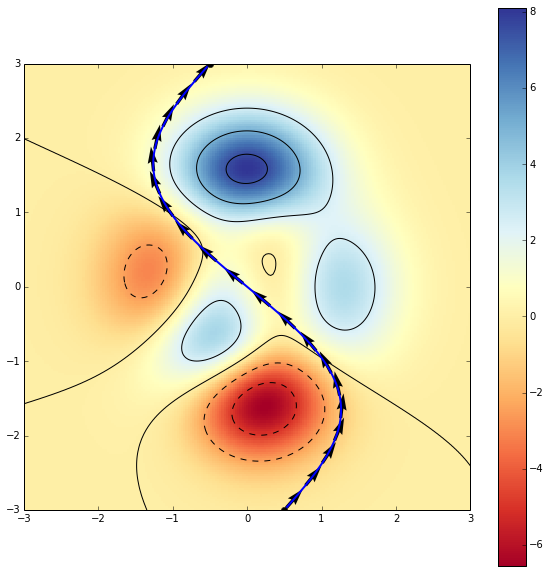

In [23]:
plt.figure(figsize=(10,10))
plt.pcolor(xt, yt, zt, cmap='RdYlBu'); plt.colorbar();
plt.contour(xt, yt, zt, colors='k');
plt.plot(x0, y0, lw=2);
plt.plot([a[0], b[0]], [a[1], b[1]], 'ok')
plt.quiver(x0[::10], y0[::10], tx[::10], ty[::10])
plt.axis('image');

In [24]:
def slopes(x0, y0, a, b, f, g):
    tx, ty = tangents(x0, y0, a, b)
    gx, gy = g(x0, y0)
    return tx*gx + ty*gy
    

In [25]:
slp = slopes(x0, y0, a, b, peaks, peaks_diff)

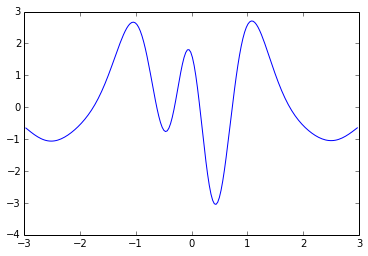

In [26]:
plt.plot(y0, slp);

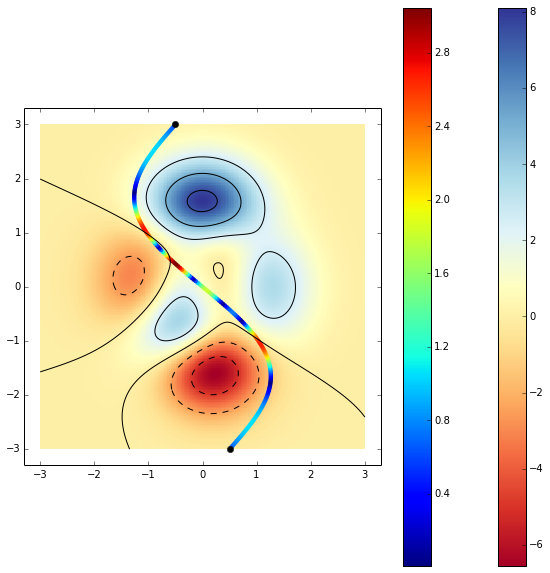

In [27]:
plt.figure(figsize=(10,10))
plt.pcolor(xt, yt, zt, cmap='RdYlBu'); plt.colorbar();
plt.contour(xt, yt, zt, colors='k');
plt.plot([a[0], b[0]], [a[1], b[1]], 'ok')
plt.scatter(x0, y0, c=abs(slp), lw=0); plt.colorbar();
plt.axis('image');

In [28]:
from IPython.core.display import HTML
def css_styling():
    styles = open('./styles/custom_barba.css', 'r').read()
    return HTML(styles)
css_styling()